In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('raw_sales.csv')

In [3]:
df.head(10)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
5,2007-04-04 00:00:00,2905,465000,house,4
6,2007-04-24 00:00:00,2607,399000,house,3
7,2007-04-30 00:00:00,2606,1530000,house,4
8,2007-05-24 00:00:00,2902,359000,house,3
9,2007-05-25 00:00:00,2906,320000,house,3


In [4]:
df.tail(10)

,datesold,postcode,price,propertyType,bedrooms
29570,2019-07-25 00:00:00,2620,172500,unit,1
29571,2019-07-25 00:00:00,2603,297500,unit,2
29572,2019-07-25 00:00:00,2606,321000,unit,1
29573,2019-07-25 00:00:00,2603,380000,unit,1
29574,2019-07-25 00:00:00,2612,475000,unit,2
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


In [5]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [7]:
df['datesold'] = pd.to_datetime(df['datesold'])

In [8]:
df['datesold']

0       2007-02-07
1       2007-02-27
2       2007-03-07
3       2007-03-09
4       2007-03-21
           ...    
29575   2019-07-25
29576   2019-07-25
29577   2019-07-26
29578   2019-07-26
29579   2019-07-26
Name: datesold, Length: 29580, dtype: datetime64[ns]

In [10]:
df['year'] = df['datesold'].dt.year
df['year']

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
29575    2019
29576    2019
29577    2019
29578    2019
29579    2019
Name: year, Length: 29580, dtype: int32

In [11]:
filtered_year = df[df['year'] == 2010]
filtered_year

,datesold,postcode,price,propertyType,bedrooms,year
1957,2010-01-04,2615,435000,house,3,2010
1958,2010-01-05,2904,712000,house,4,2010
1959,2010-01-06,2617,435000,house,4,2010
1960,2010-01-06,2606,1350000,house,5,2010
1961,2010-01-07,2905,612500,house,4,2010
...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,2010
24984,2010-12-20,2905,350000,unit,2,2010
24985,2010-12-21,2612,640000,unit,2,2010
24986,2010-12-24,2606,300000,unit,1,2010


In [14]:
df['month'] = df['datesold'].dt.month
df

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


In [15]:
df['month']

0        2
1        2
2        3
3        3
4        3
        ..
29575    7
29576    7
29577    7
29578    7
29579    7
Name: month, Length: 29580, dtype: int32

In [16]:
filtered_month = df[df['month'] == 3  ]
filtered_month

,datesold,postcode,price,propertyType,bedrooms,year,month
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
168,2008-03-13,2611,646000,house,4,2008,3
169,2008-03-14,2615,655000,house,4,2008,3
...,...,...,...,...,...,...,...
29371,2019-03-27,2900,436500,unit,3,2019,3
29372,2019-03-27,2617,452000,unit,2,2019,3
29373,2019-03-28,2912,269000,unit,1,2019,3
29374,2019-03-28,2602,280000,unit,1,2019,3


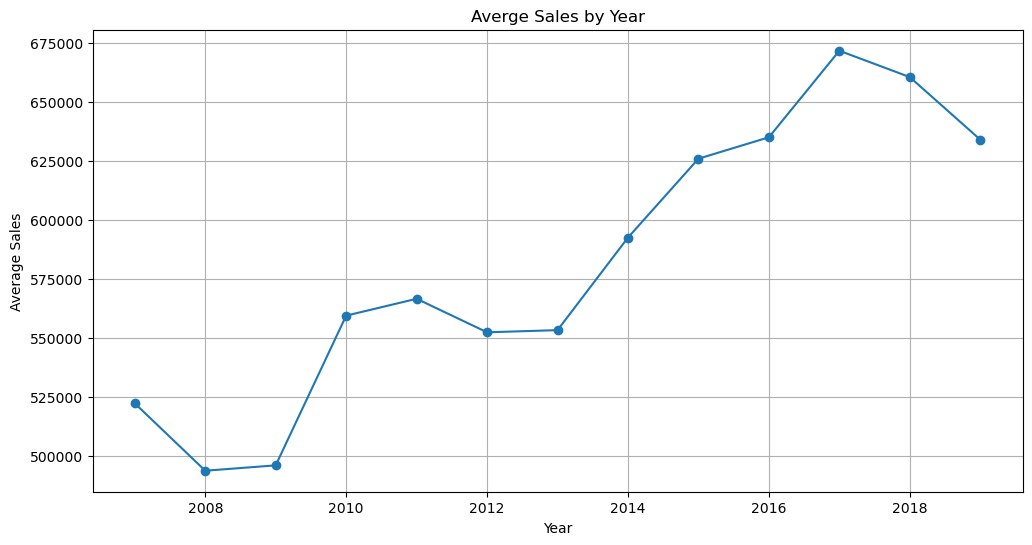

In [20]:
plt.figure(figsize = (12,6))
yearly_avg = df.groupby('year')['price'].mean()
yearly_avg.plot(marker = 'o')
plt.title('Averge Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

In [28]:
#count of houses sold per year
count_per_year = df.groupby('year')['propertyType'].count()
count_per_year

year
2007     147
2008     639
2009    1426
2010    1555
2011    1633
2012    1858
2013    2119
2014    2863
2015    3648
2016    3908
2017    4541
2018    3858
2019    1385
Name: propertyType, dtype: int64

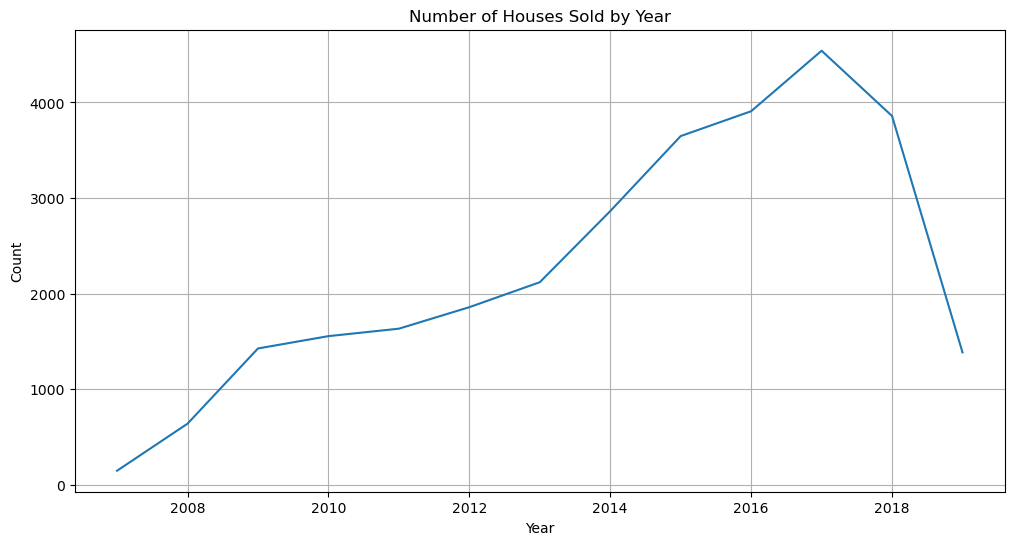

In [30]:
#line plot
plt.figure(figsize = (12,6))
count_per_year.plot()
plt.title('Number of Houses Sold by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

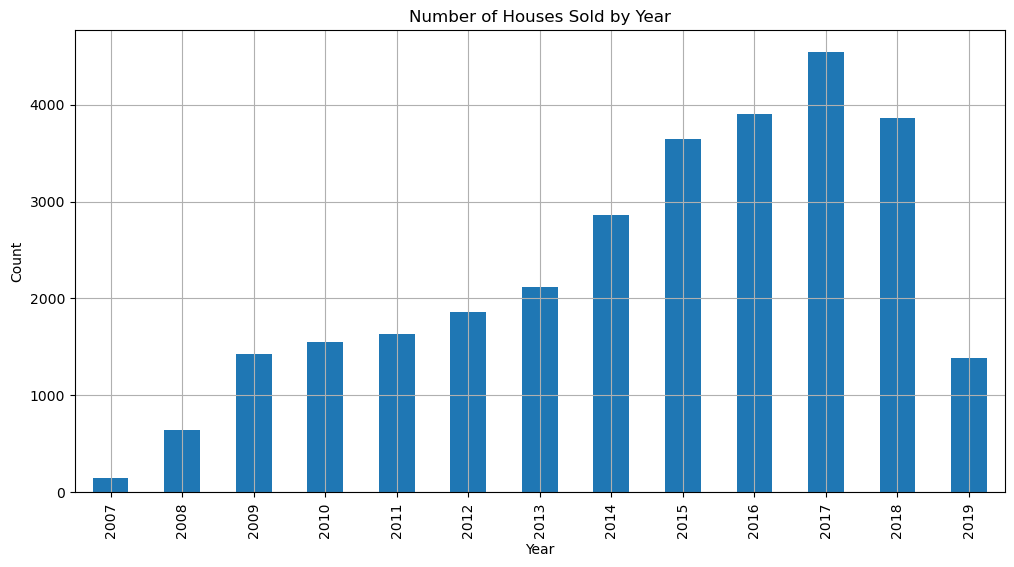

In [34]:
#bar plot
plt.figure(figsize = (12,6))
yearly_count = df['year'].value_counts().sort_index()
yearly_count.plot(kind = 'bar')
plt.title('Number of Houses Sold by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [36]:
#Query for a specific date range
start_date = '2010-01-01'
end_date = '2015-12-31'
date_range_data = df[(df['datesold'] >= start_date) & (df['datesold'] <= end_date)]
print(f"\nData between {start_date} and {end_date}:")
date_range_data


Data between 2010-01-01 and 2015-12-31:


,datesold,postcode,price,propertyType,bedrooms,year,month
1957,2010-01-04,2615,435000,house,3,2010,1
1958,2010-01-05,2904,712000,house,4,2010,1
1959,2010-01-06,2617,435000,house,4,2010,1
1960,2010-01-06,2606,1350000,house,5,2010,1
1961,2010-01-07,2905,612500,house,4,2010,1
...,...,...,...,...,...,...,...
26612,2015-12-23,2603,415000,unit,2,2015,12
26613,2015-12-23,2612,438000,unit,2,2015,12
26614,2015-12-23,2612,450000,unit,2,2015,12
26615,2015-12-23,2605,515000,unit,2,2015,12


In [39]:
#Calculate the mean price month-wise (use Groupby)
filter_month = df.groupby(['year','month'])['price'].mean()
filter_month

year  month
2007  2        407500.000000
      3        339333.333333
      4        798000.000000
      5        339500.000000
      6        520333.333333
                   ...      
2019  3        651666.737288
      4        655325.561321
      5        641491.136364
      6        703275.396825
      7        583192.056000
Name: price, Length: 150, dtype: float64

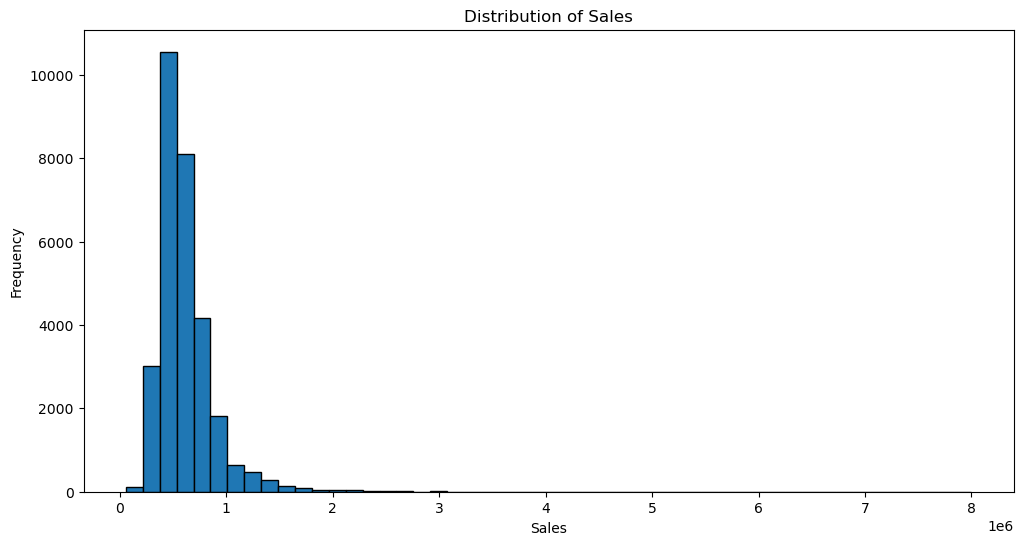

In [40]:
# Perform a histogram plot
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [41]:
#Print the property price > 5Lakhs 
filter_price = df[df['price'] > 500000]
filter_price

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
7,2007-04-30,2606,1530000,house,4,2007,4
12,2007-06-27,2612,850000,house,4,2007,6
13,2007-06-28,2904,765000,house,4,2007,6
14,2007-06-30,2615,517000,house,4,2007,6
...,...,...,...,...,...,...,...
29567,2019-07-23,2912,549950,unit,3,2019,7
29569,2019-07-24,2601,590000,unit,1,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


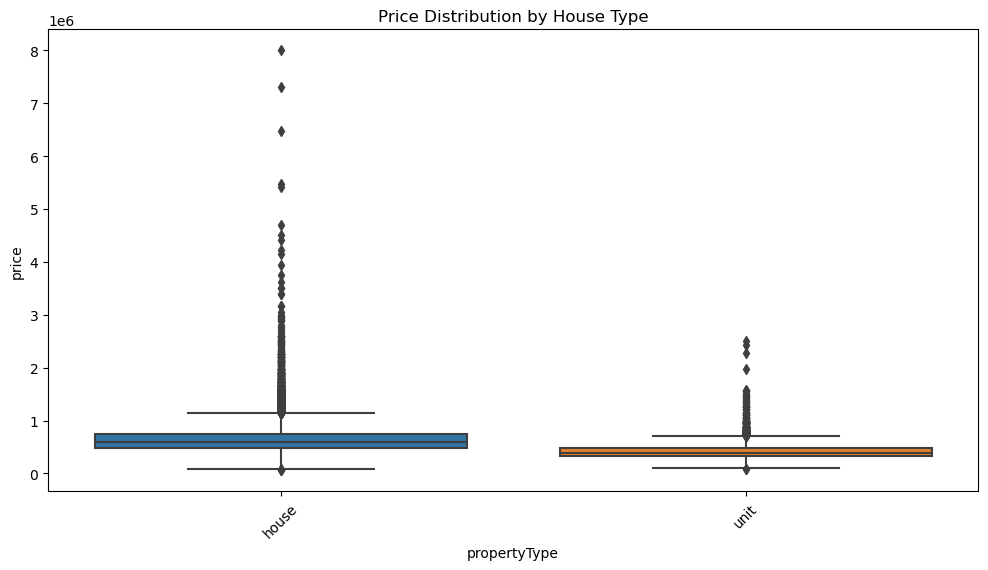

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='propertyType', y='price', data=df)
plt.title('Price Distribution by House Type')
plt.xticks(rotation=45)
plt.show()

In [45]:
 #Additional statistics
print(df.groupby('propertyType')['price'].agg(['count', 'mean', 'min', 'max']))

              count           mean    min      max
propertyType                                      
house         24552  647956.128462  56500  8000000
unit           5028  423106.557279  85000  2500000


In [46]:
print(df.groupby('bedrooms')['price'].agg(['count', 'mean', 'min', 'max']))

          count           mean     min      max
bedrooms                                       
0            30  542300.000000   90000  1160000
1          1627  335992.905962   85000  2280000
2          3598  442222.917454   96000  3050000
3         11933  552304.428140   69000  6480000
4         10442  718171.142023   56500  8000000
5          1950  919056.058974  210000  7300000


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

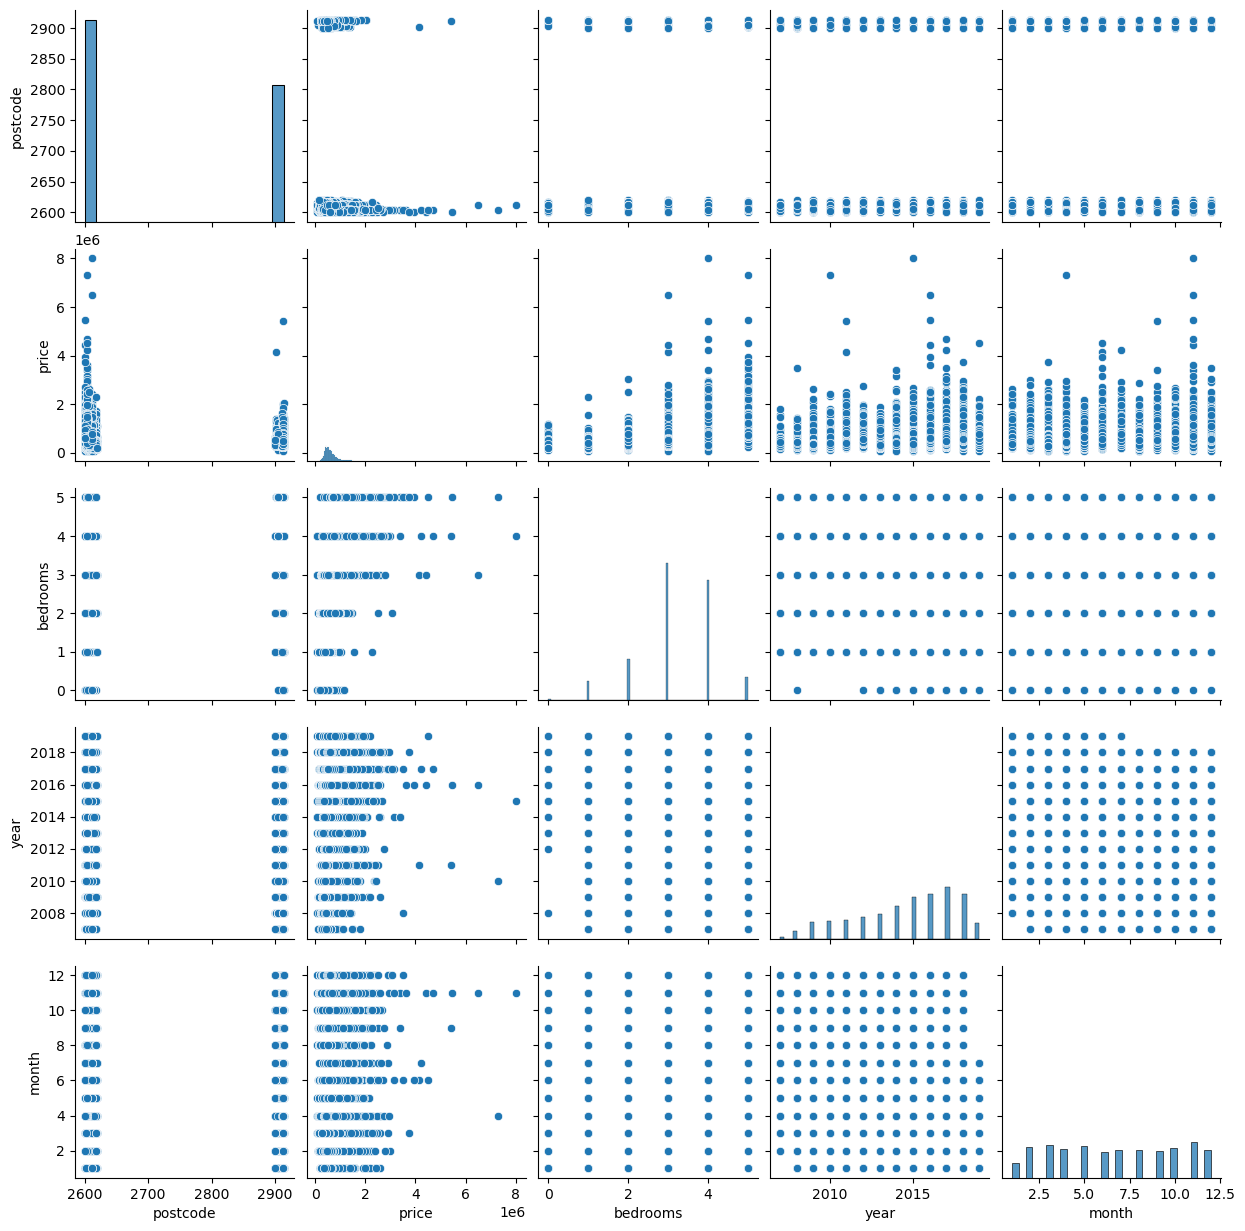

In [47]:
sns.pairplot(df)